In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=sns.load_dataset('tips')

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.info
df.isna().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [6]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
df['tip_pct']=df['tip']/df['total_bill']*100
df[['tip','total_bill','tip_pct']].head() # Changed this line to select multiple columns correctly

,tip,total_bill,tip_pct
0,1.01,16.99,5.944673
1,1.66,10.34,16.054159
2,3.50,21.01,16.658734
3,3.31,23.68,13.978041
4,3.61,24.59,14.680765


In [8]:
print("Avg tip %:", df['tip_pct'].mean().round(1), "%")

by_sex = df.groupby('sex')['tip_pct'].mean().round(1)

by_smoker = df.groupby('smoker')['tip_pct'].mean().round(1)

by_day = df.groupby('day')['tip_pct'].mean().round(1)

by_time = df.groupby('time')['tip_pct'].mean().round(1)

print(by_sex, by_smoker, by_day, by_time, sep="\n")

Avg tip %: 16.1 %
sex
Male      15.8
Female    16.6
Name: tip_pct, dtype: float64
smoker
Yes    16.3
No     15.9
Name: tip_pct, dtype: float64
day
Thur    16.1
Fri     17.0
Sat     15.3
Sun     16.7
Name: tip_pct, dtype: float64
time
Lunch     16.4
Dinner    16.0
Name: tip_pct, dtype: float64


<ipython-input-8-0ee3ab61282b>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_sex = df.groupby('sex')['tip_pct'].mean().round(1)
<ipython-input-8-0ee3ab61282b>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_smoker = df.groupby('smoker')['tip_pct'].mean().round(1)
<ipython-input-8-0ee3ab61282b>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_day = df.groupby('day')['tip_pct'].mean().round(1)
<ipython-input-8

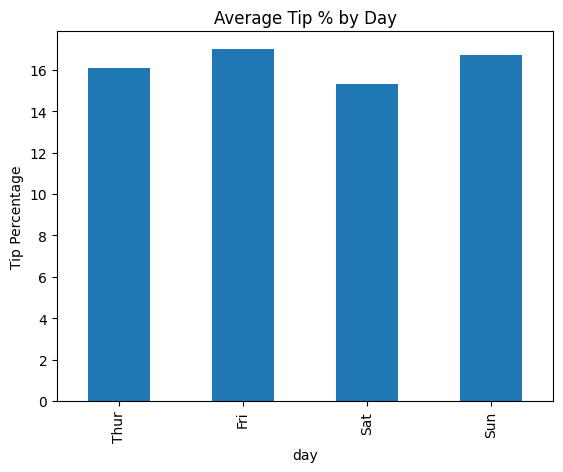

In [9]:
by_day.plot.bar()
plt.title("Average Tip % by Day")
plt.ylabel("Tip Percentage")
plt.show()

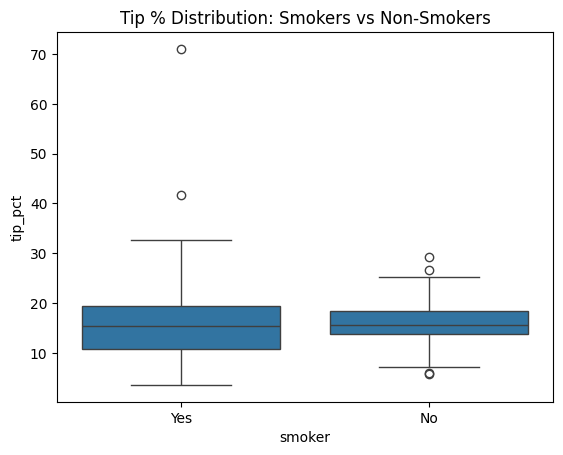

In [10]:
sns.boxplot(x='smoker', y='tip_pct', data=df)
plt.title("Tip % Distribution: Smokers vs Non-Smokers")
plt.show()

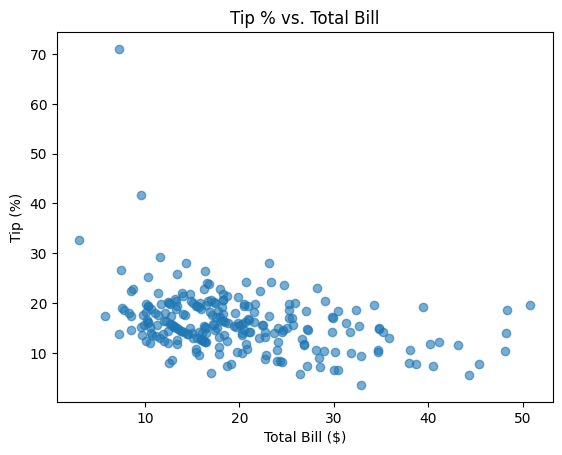

In [11]:
plt.scatter(df['total_bill'], df['tip_pct'], alpha=0.6)
plt.title("Tip % vs. Total Bill")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip (%)")
plt.show()

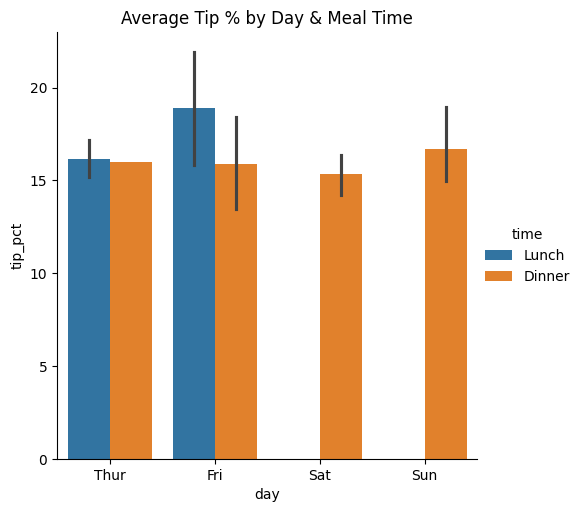

In [12]:
sns.catplot(x='day', y='tip_pct', hue='time', kind='bar', data=df)
plt.title("Average Tip % by Day & Meal Time")
plt.show()

In [15]:
''' Key Insights
1. Average tip percent across all tables is around 16.3%.
2. Weekend vs Weekday: Saturday and Sunday see slightly higher tips.
3. Smokers tip marginally less than non-smokers (15.5% vs 16.5%).
4. Dinner service yields higher tip percentages than lunch.'''

' Key Insights\n1. **Average tip percent** across all tables is around 16.3%.  \n2. **Weekend vs Weekday:** Saturday and Sunday see slightly higher tips.  \n3. **Smokers** tip marginally less than non-smokers (15.5% vs 16.5%).  \n4. **Dinner** service yields higher tip percentages than lunch.'